In [1]:
import numpy as np
import matplotlib.pyplot as plt
def save_cmap(cmap, name):
      gradient = np.linspace(0, 1, 256)
      gradient = np.vstack((gradient, gradient))
   
      fig, ax = plt.subplots(figsize=(6, 1))
      ax.imshow(gradient, aspect='auto', cmap=cmap)
      ax.set_axis_off()
   
      fig.savefig('{}.png'.format(name), bbox_inches='tight', pad_inches=0)
      plt.close(fig)

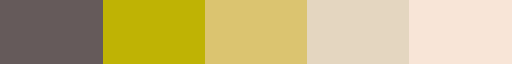

In [2]:
from pypalettes import load_cmap

cmap = load_cmap('Chaetodon_sedentarius')
save_cmap(cmap, 'images/simple')
cmap

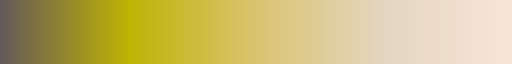

In [3]:
from pypalettes import load_cmap

cmap = load_cmap('Chaetodon_sedentarius', type='continuous')
save_cmap(cmap, 'images/continuous')
cmap

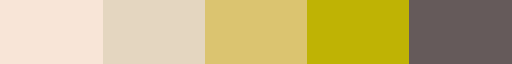

In [4]:
from pypalettes import load_cmap

cmap = load_cmap('Chaetodon_sedentarius', reverse=True)
save_cmap(cmap, 'images/reverse')
cmap

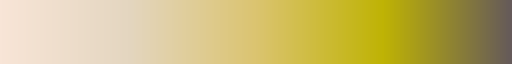

In [5]:
from pypalettes import load_cmap

cmap = load_cmap('Chaetodon_sedentarius', reverse=True, type='continuous')
save_cmap(cmap, 'images/continuous_reverse')
cmap

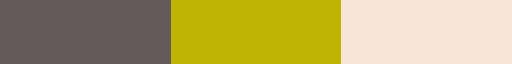

In [6]:
from pypalettes import load_cmap

cmap = load_cmap('Chaetodon_sedentarius', keep=[True, True, False, False, True])
save_cmap(cmap, 'images/keep')
cmap

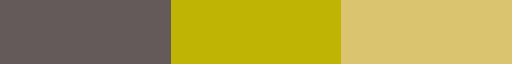

In [7]:
from pypalettes import load_cmap

cmap = load_cmap('Chaetodon_sedentarius', keep_first_n=3)
save_cmap(cmap, 'images/keep_first_n')
cmap

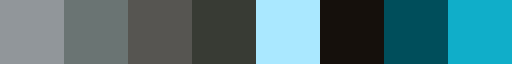

In [8]:
from pypalettes import load_cmap

cmap = load_cmap()
save_cmap(cmap, 'images/random')
cmap

In [9]:
from pypalettes import load_cmap

cmap = load_cmap("Acadia")

print(f'First color (rgba): {cmap(0)}')
print(f'Second color (rgba): {cmap(1)}')
print(f'Third color (rgba): {cmap(2)}')
print(f'Fourth color (rgba): {cmap(3)}')  
print(f'Fifth color (rgba): {cmap(4)}')
print(f'Sixth color (rgba): {cmap(5)}')
print(f'Seventh color (rgba): {cmap(6)}')
print(f'Eighth color (rgba): {cmap(7)}')

print()
print('Once you start calling colors above the number of colors in the palette, it will start repeating the colors:')
print(f'cmap(6) == cmap(7): {cmap(6) == cmap(7)}')

First color (rgba): (0.996078431372549, 0.8431372549019608, 0.5372549019607843, 1.0)
Second color (rgba): (0.00784313725490196, 0.21568627450980393, 0.2627450980392157, 1.0)
Third color (rgba): (0.4470588235294118, 0.5294117647058824, 0.3058823529411765, 1.0)
Fourth color (rgba): (0.2784313725490196, 0.43529411764705883, 0.5176470588235295, 1.0)
Fifth color (rgba): (0.6431372549019608, 0.7450980392156863, 0.8352941176470589, 1.0)
Sixth color (rgba): (0.27058823529411763, 0.2235294117647059, 0.2784313725490196, 1.0)
Seventh color (rgba): (0.27058823529411763, 0.2235294117647059, 0.2784313725490196, 1.0)
Eighth color (rgba): (0.27058823529411763, 0.2235294117647059, 0.2784313725490196, 1.0)

Once you start calling colors above the number of colors in the palette, it will start repeating the colors:
cmap(6) == cmap(7): True


In [10]:
# find where a palette comes from
from pypalettes import get_source
get_source('bilbao')

'The R package: {khroma}'

In [11]:
# get a list of hex colors from a palette
from pypalettes import get_hex
get_hex('pupitar')

['#7098C0FF',
 '#88C0E8FF',
 '#285880FF',
 '#B8E0F8FF',
 '#F8F8F8FF',
 '#404060FF',
 '#A8A8A8FF',
 '#C8C8D0FF',
 '#B04000FF']

In [12]:
# get a string that describes the kind of palette
from pypalettes import get_kind
get_kind('pupitar')

'qualitative'

In [13]:
# get a list of rgb colors from a palette
from pypalettes import get_rgb
get_rgb('AirNomads')

[(255, 153, 51),
 (194, 72, 65),
 (255, 255, 51),
 (139, 91, 69),
 (135, 175, 209),
 (238, 176, 90),
 (219, 197, 160)]

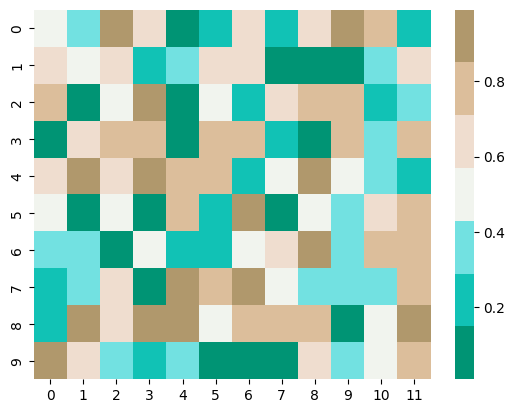

In [14]:
# use a palette for a heatmap

import matplotlib.pyplot as plt
import seaborn as sns
from pypalettes import load_cmap
import numpy as np

data = np.random.rand(10, 12)

cmap = load_cmap('Anemone')

sns.heatmap(data, cmap=cmap)
plt.savefig('images/heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# check our pypalettes handle name errors
from pypalettes import load_cmap
cmap = load_cmap('colwarm')
cmap

ValueError: Palette with name 'colwarm' not found. Did you mean:
coolwarm, coolwarm_r, cassowary, cool_r, colors?

See available palettes at https://python-graph-gallery.com/color-palette-finder/